In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("medical_cost.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [ ]:
df1 = df.drop(['sex', 'region', 'smoker', 'charges'], axis=1)
df1

,Id,age,bmi,children
0,1,19,27.900,0
1,2,18,33.770,1
2,3,28,33.000,3
3,4,33,22.705,0
4,5,32,28.880,0
...,...,...,...,...
1333,1334,50,30.970,3
1334,1335,18,31.920,0
1335,1336,18,36.850,0
1336,1337,21,25.800,0


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

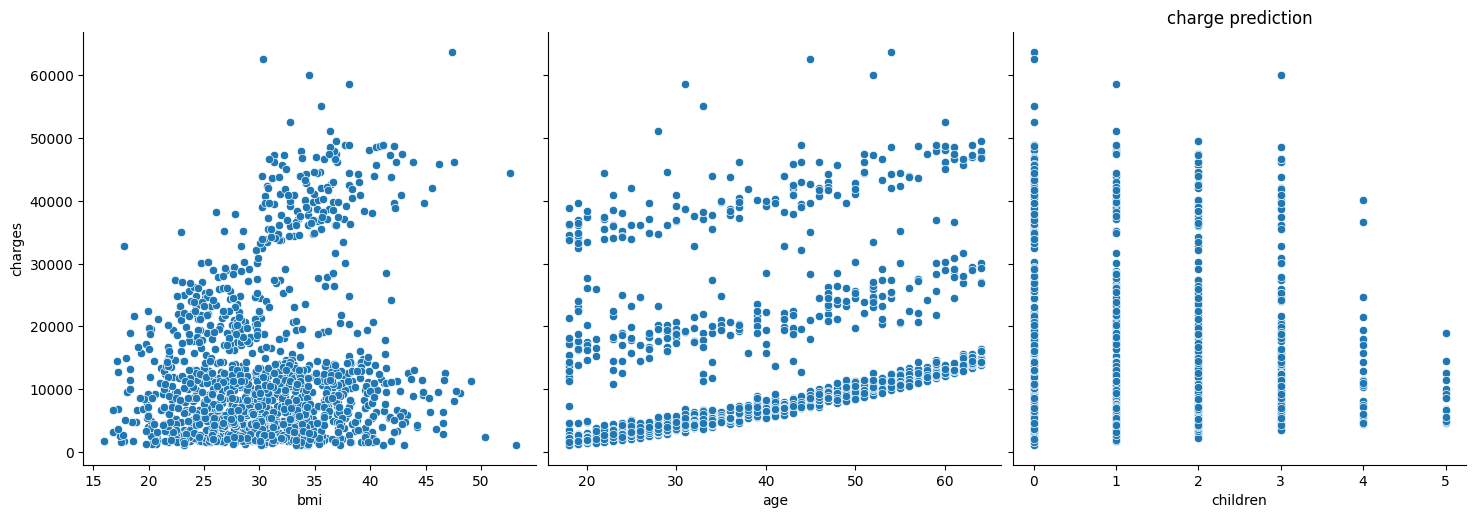

In [ ]:
plt.figure(figsize=(12, 6))
sns.pairplot(df,x_vars=['bmi', 'age', 'children'],y_vars= ['charges'],size = 5,kind = 'scatter')
plt.title('charge prediction')
plt.show()

In [ ]:
X = df1
Y = df['charges']
X

,Id,age,bmi,children
0,1,19,27.900,0
1,2,18,33.770,1
2,3,28,33.000,3
3,4,33,22.705,0
4,5,32,28.880,0
...,...,...,...,...
1333,1334,50,30.970,3
1334,1335,18,31.920,0
1335,1336,18,36.850,0
1336,1337,21,25.800,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.7,random_state = 100)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(936, 4)
(936,)
(402, 4)


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_predict = lr_model.predict(X_test)
y_predict

array([ 9971.62533597, 10046.03819317, 13020.83105471,  7974.28837294,
        5863.50455445, 17818.14558636, 19014.58684013,  7473.96284759,
       10947.50631317, 20193.66073392, 20283.96025844,  9960.5878226 ,
       15760.57046809,  9131.4992804 , 14592.91997389, 13585.68585963,
       16252.29744809, 18074.7841004 , 12150.03930815, 23093.83944238,
       19085.8197494 ,  8103.21379498, 11209.61466455, 12212.40578486,
       18375.32516489, 13359.76060186, 11293.48496939, 20428.51699801,
       12605.96389256, 17986.8713688 , 23383.39030768,  7466.88466759,
       20064.00109809,  7514.86926234, 13515.31137881, 16132.83007737,
       13072.48388449, 13509.09455099,  8965.74478605, 19621.01527635,
       12689.70246331, 16811.85071781, 10521.63080685, 13680.39860815,
        5685.287334  , 10315.71419615, 10133.74465875,  8838.47132924,
        6823.45734335, 15856.3051772 , 22014.4507665 , 12240.01298952,
       10120.11348032, 12948.93947739, 12003.93491463, 18730.65294534,
      

In [ ]:
train_accuracy = lr_model.score(X_train, Y_train)
train_accuracy

0.12378421593147859

In [ ]:
test_accuracy = lr_model.score(X_test, Y_test)
test_accuracy

0.10803091879737337

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print('Mean absolute error = ', mean_absolute_error(Y_test, y_predict))
print('Mean square error = ', mean_squared_error(Y_test, y_predict))
print('R2 Score = ', r2_score(Y_test, y_predict))

Mean absolute error =  8913.844292267313
Mean square error =  129511850.04259177
R2 Score =  0.10803091879737337


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(x_train_poly, Y_train)

LinearRegression()

In [ ]:
predict_train_poly = model.predict(x_train_poly)
predict_train_poly

array([15044.33473121, 15258.02891109, 16200.60979988,  8707.99535517,
       13846.8786837 , 10713.8990275 , 18397.17073706, 13971.54005283,
       15842.83368789, 14079.42476684, 13946.06483658,  9475.8669816 ,
       14471.09261179, 10523.90597955, 10655.37870161, 11842.64821041,
       11745.4280521 ,  6379.88423108, 17946.64793066, 15443.19294959,
       10268.21239222, 17844.32040101, 17536.05599311,  5891.21903971,
       17678.86106814, 11633.15610955, 13344.83625859, 14658.3778061 ,
        9992.21485914, 13157.1336696 , 16005.4050424 ,  8974.02039716,
        9938.59817016, 10425.43781262, 23280.70538489, 18982.25028882,
       12918.37489534, 14894.30982976, 10878.0987212 ,  9510.10323391,
       16858.62854443, 13708.41565689, 16366.20976901,  9964.53511266,
        4235.32771668,  7159.51881582, 13342.56320898,  6279.68939467,
       13932.74506505, 10331.95179734, 12711.44873544, 16716.82394642,
       10028.96468364,  7606.25664456,  9058.06828926, 17651.08097145,
      

In [ ]:
predict_test_poly = model.predict(x_test_poly)
predict_test_poly

array([11689.17023208,  9523.31945884, 12302.77022272,  8001.26504629,
        6767.46496861, 20870.81069979, 18769.88757031,  9032.88203844,
       10337.36019024, 18562.0438998 , 18202.47588021, 10480.37218279,
       15573.10158191,  8530.81242981, 14724.64751907, 14327.51538832,
       14903.46411833, 13519.30039173, 11649.34314497, 22227.02398812,
       20324.77652674,  7946.84873602,  9206.63187509, 13894.4258703 ,
       18045.5938519 , 12746.35186664, 10060.74667857, 22181.13868637,
       12731.84840841, 18066.10304337, 18582.37486001,  8584.27494185,
       21585.11293176,  8193.97765917, 13191.45076586, 18268.51579097,
       13947.26107576, 12915.98514435,  9073.84549913, 21691.76808776,
       12095.68982447, 16175.13182751,  9511.60656139, 14375.70759069,
        5549.71614905,  8685.98615165,  9297.31716072,  9928.13276176,
       10967.22751092, 12731.15935066, 23547.17355047, 10519.47834617,
        9661.04746577, 12051.06543069, 11597.92418482, 18528.67628377,
      

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(936, 4)
(936,)


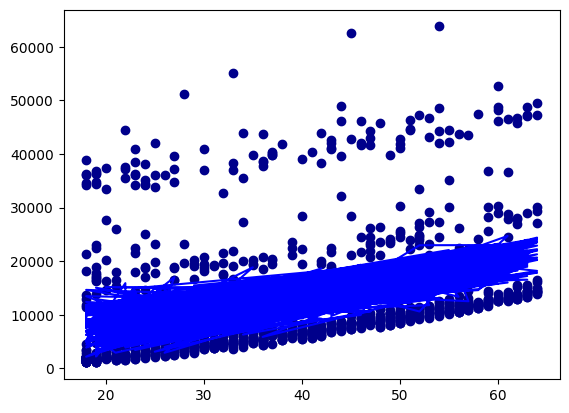

In [ ]:
ax = plt.scatter(x = X_train['age'], y = Y_train, color = 'DarkBlue')
plt.plot(X_train['age'], predict_train_poly, color = 'blue')
plt.show()

In [ ]:
train_accuracy = model.score(x_train_poly, Y_train)
train_accuracy

0.13824054148969722

In [ ]:
test_accuracy = model.score(x_test_poly, Y_test)
test_accuracy

0.10531061237210604

In [ ]:
print('Mean absolute error = ', mean_absolute_error(Y_test,predict_test_poly))
print('Mean square error = ', mean_squared_error(Y_test,predict_test_poly))
print('R2 Score = ', r2_score(Y_test,predict_test_poly))

Mean absolute error =  8874.124489883648
Mean square error =  129906832.25132944
R2 Score =  0.10531061237210604
